Mounted at /content/drive


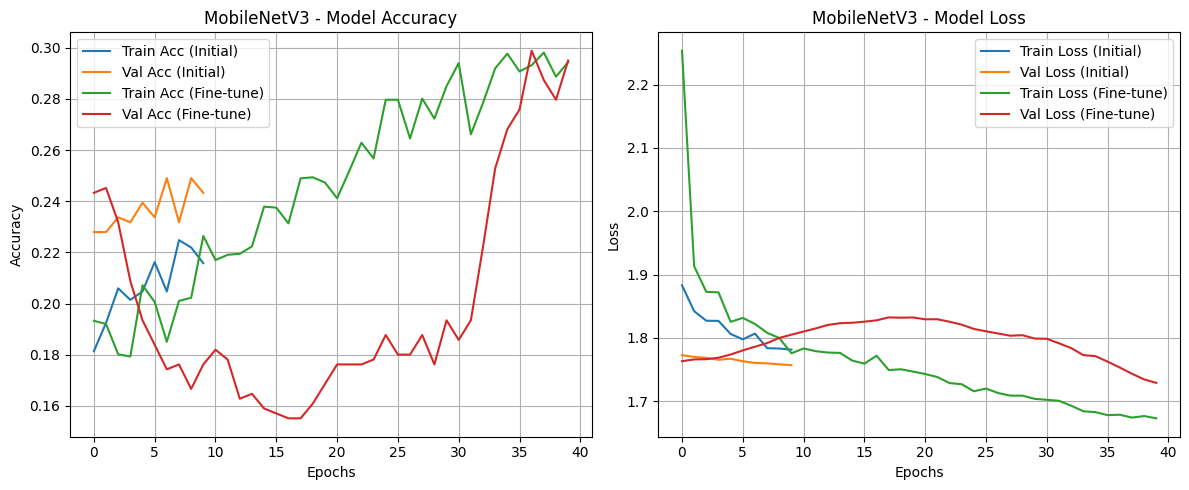


📊 Final Performance Metrics for MobileNetV3:
Val_accuracy: 0.2950
Val_map: 0.2813
Total_time: 1818.4402


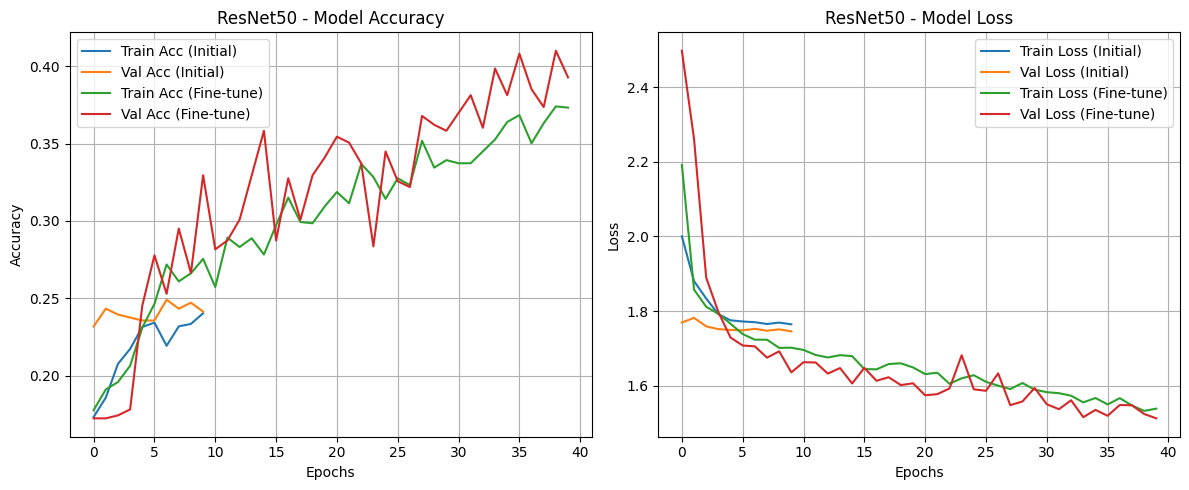


📊 Final Performance Metrics for ResNet50:
Val_accuracy: 0.3927
Val_map: 0.4339
Total_time: 2228.1844


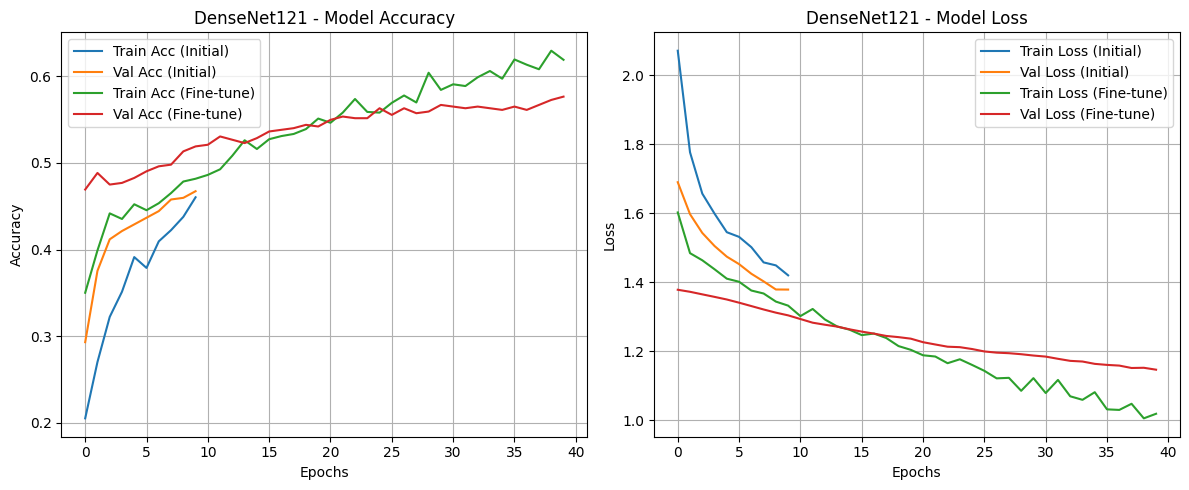


📊 Final Performance Metrics for DenseNet121:
Val_accuracy: 0.5766
Val_map: 0.6283
Total_time: 2094.2815


In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Set file paths
base_path = '/content/drive/My Drive/'

model_files = {
    "MobileNetV3": {
        "init": base_path + 'mobilenetv3_initial_history.pkl',
        "ft": base_path + 'mobilenetv3_finetune_history.pkl',
        "perf": base_path + 'mobilenetv3_performance.pkl'
    },
    "ResNet50": {
        "init": base_path + 'resnet50_initial_history.pkl',
        "ft": base_path + 'resnet50_finetune_history.pkl',
        "perf": base_path + 'resnet50_performance.pkl'
    },
    "DenseNet121": {
        "init": base_path + 'densenet121_initial_history.pkl',
        "ft": base_path + 'densenet121_finetune_history.pkl',
        "perf": base_path + 'densenet121_performance.pkl'
    }
}

# STEP 3: Import libraries
import pickle
import matplotlib.pyplot as plt

# STEP 4: Define reusable plot + performance display function
def plot_model(name, init_file, ft_file, perf_file):
    with open(init_file, 'rb') as f:
        init_history = pickle.load(f)
    with open(ft_file, 'rb') as f:
        ft_history = pickle.load(f)
    with open(perf_file, 'rb') as f:
        performance = pickle.load(f)

    # Plot
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(init_history['accuracy'], label='Train Acc (Initial)')
    plt.plot(init_history['val_accuracy'], label='Val Acc (Initial)')
    plt.plot(ft_history['accuracy'], label='Train Acc (Fine-tune)')
    plt.plot(ft_history['val_accuracy'], label='Val Acc (Fine-tune)')
    plt.title(f"{name} - Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(init_history['loss'], label='Train Loss (Initial)')
    plt.plot(init_history['val_loss'], label='Val Loss (Initial)')
    plt.plot(ft_history['loss'], label='Train Loss (Fine-tune)')
    plt.plot(ft_history['val_loss'], label='Val Loss (Fine-tune)')
    plt.title(f"{name} - Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print performance
    print(f"\n📊 Final Performance Metrics for {name}:")
    for metric, value in performance.items():
        print(f"{metric.capitalize()}: {value:.4f}")

# STEP 5: Loop through all models
for model_name, paths in model_files.items():
    plot_model(model_name, paths["init"], paths["ft"], paths["perf"])
